In [1]:
 import pandas as pd
 df=pd.read_csv("spam.csv",encoding = "ISO-8859-1")
 df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
#Data cleaning and preprocessing

import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhij\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from nltk.corpus import stopwords
from nltk.corpus import LazyCorpusLoader
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
print(len(df))
for i in range(0, len(df)):
 review = re.sub('[^a-zA-Z]', ' ', df['v2'][i])
 review = review.lower()
 review = review.split()
 
 review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
 review = ' '.join(review)
 corpus.append(review)

5572


In [4]:
print(corpus[2])
print(len(corpus))

free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli
5572


In [5]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()
print(X[0])
y=pd.get_dummies(df['v1'])
print(y)
y=y.iloc[:,0].values
print(y)

[0 0 0 ... 0 0 0]
        ham   spam
0      True  False
1      True  False
2     False   True
3      True  False
4      True  False
...     ...    ...
5567  False   True
5568   True  False
5569   True  False
5570   True  False
5571   True  False

[5572 rows x 2 columns]
[ True  True False ...  True  True  True]


In [6]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# Training model using Naive bayes classifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
spam_detect_model = GaussianNB().fit(X_train, y_train)
y_pred=spam_detect_model.predict(X_test)

In [7]:
y_pred

array([False,  True,  True, ...,  True, False, False])

In [8]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Testing accuracy ",accuracy_score(y_test,y_pred))
print("Classification Report ",classification_report(y_test,y_pred))

Testing accuracy  0.8556053811659193
Classification Report                precision    recall  f1-score   support

       False       0.47      0.90      0.62       145
        True       0.98      0.85      0.91       970

    accuracy                           0.86      1115
   macro avg       0.73      0.87      0.76      1115
weighted avg       0.92      0.86      0.87      1115



In [9]:
print("Confusion Matrix ",confusion_matrix(y_test,y_pred))

Confusion Matrix  [[130  15]
 [146 824]]


<Axes: >

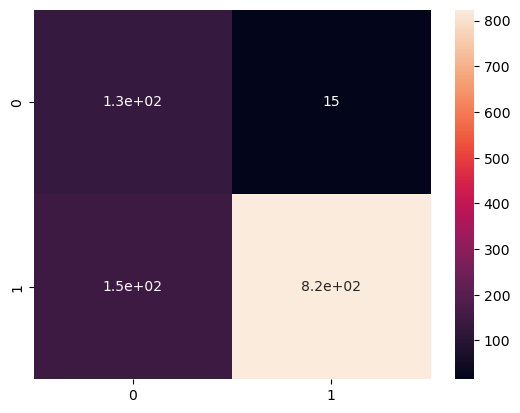

In [10]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [11]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(X_train, y_train)
y_predict1=svc_model.predict(X_test)
print("Testing accuracy ",accuracy_score(y_test,y_predict1))
print("Classification Report ",classification_report(y_test,y_predict1))

Testing accuracy  0.9811659192825112
Classification Report                precision    recall  f1-score   support

       False       0.99      0.86      0.92       145
        True       0.98      1.00      0.99       970

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115

